In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('.') if f.endswith('.csv')]
# Sort the files descending
files.sort(reverse=True)

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')

result_file_path = f'{files[0]}'

Found 1 files
Newest file: 2023-06-12-11-55-42.csv


In [3]:
results_df: pd.DataFrame = pd.read_csv(result_file_path)
# Print basic information about the dataframe
print(results_df.info())

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                731 non-null    int64  
 1   TimeStamp           731 non-null    float64
 2   AvgEnergy           731 non-null    float64
 3   NoBoids             731 non-null    int64  
 4   NoFoodSources       731 non-null    int64  
 5   TotalFoodAvailable  731 non-null    int64  
 6   Polarization        731 non-null    float64
 7   Expanse             731 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 45.8 KB
None


,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.00209,282.9992,25,0,0,0.455601,1.133204
1,1,29.99991,282.9760,25,0,0,0.476619,1.116590
2,2,59.99985,282.9527,25,0,0,0.486147,1.052136
3,3,89.99978,282.9294,25,0,0,0.474067,1.053003
4,4,119.99840,282.9062,25,0,0,0.476576,1.077438


In [14]:
# Configuration:

truncated_df = results_df.iloc[:721]

print(truncated_df.describe())

truncated_df.head()

            Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  721.00000    721.000000  721.000000    721.0          721.0   
mean   360.00000  10801.544064  274.624236     25.0            0.0   
std    208.27906   6249.528373    4.845380      0.0            0.0   
min      0.00000      0.002090  266.249200     25.0            0.0   
25%    180.00000   5400.296000  270.436700     25.0            0.0   
50%    360.00000  10801.090000  274.624200     25.0            0.0   
75%    540.00000  16203.020000  278.811700     25.0            0.0   
max    720.00000  21603.030000  282.999200     25.0            0.0   

       TotalFoodAvailable  Polarization     Expanse  
count               721.0    721.000000  721.000000  
mean                  0.0      0.468016    0.991577  
std                   0.0      0.024520    0.114994  
min                   0.0      0.320154    0.683375  
25%                   0.0      0.455726    0.909610  
50%                   0.0      0.474269    0.

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.00209,282.9992,25,0,0,0.455601,1.133204
1,1,29.99991,282.9760,25,0,0,0.476619,1.116590
2,2,59.99985,282.9527,25,0,0,0.486147,1.052136
3,3,89.99978,282.9294,25,0,0,0.474067,1.053003
4,4,119.99840,282.9062,25,0,0,0.476576,1.077438


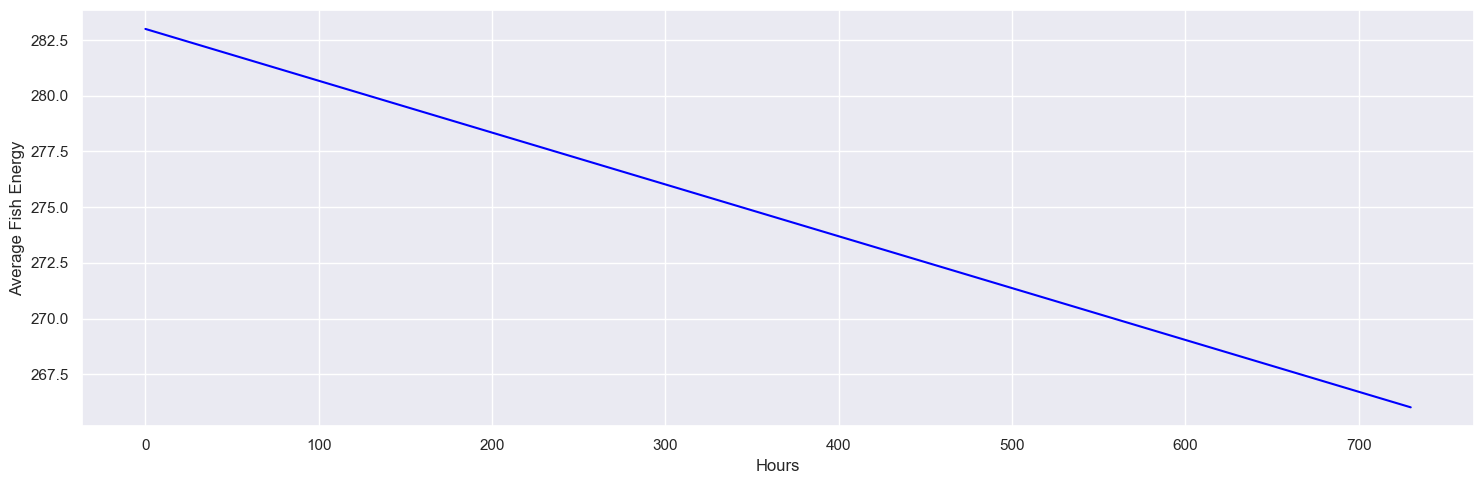

In [19]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='AvgEnergy', color='blue', ax=ax)
plt.xlabel('Hours')
plt.ylabel('Average Fish Energy')
plt.tight_layout()
 
plt.savefig('plots/exp1-AvgEnergy.pdf')

In [22]:
# Compute coefficient in avg energy
min_energy = truncated_df['AvgEnergy'].min()
max_energy = truncated_df['AvgEnergy'].max()
print(f'Min energy: {min_energy}')
print(f'Max energy: {max_energy}')
print(f'Coefficient: {(max_energy - min_energy) / 30}')

Min energy: 266.2492
Max energy: 282.9992
Coefficient: 0.5583333333333333
